In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [8]:
irisdata = pd.read_csv(url, names=colnames)

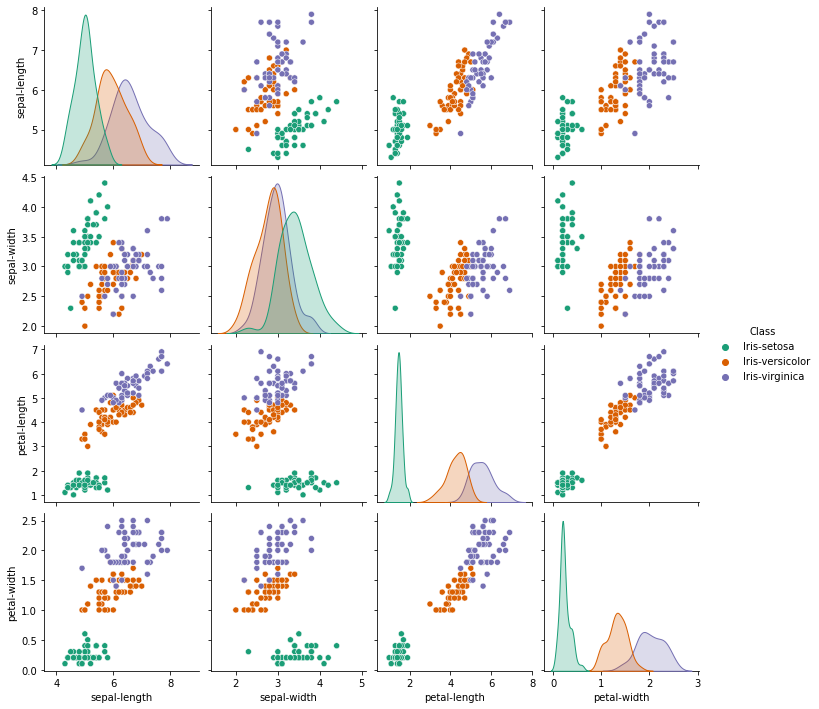

In [31]:
import seaborn as sns
sns.pairplot(irisdata,hue='Class',palette='Dark2')

In [9]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)


SVC(degree=8, kernel='poly')

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)


SVC()

In [15]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [17]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  0  0]
 [13  0  0]
 [ 9  0  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.27      1.00      0.42         8
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.00      0.00      0.00         9

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [22]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.708 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [32]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


In [27]:
grid_scores = grid.cv_results_

In [23]:
pred_grid = grid.predict(X_test)

In [33]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_grid))
print(classification_report(y_test, pred_grid))

[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [34]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [40]:
for i in range(4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
  svclassifier = getClassifier(i) 
  svclassifier.fit(X_train, y_train)# Make prediction
  y_pred = svclassifier.predict(X_test)# Evaluate our model
  print("Evaluation:", kernels[i], "kernel")
  print(classification_report(y_test,y_pred))



Evaluation: Polynomial kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.88        30
   weighted avg       0.90      0.90      0.90        30

Evaluation: RBF kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Evaluation: Sigmoid kernel
                 precision    recall  f1-score   support

    Iris-setosa       0.23      1.00      0.38         7
I

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


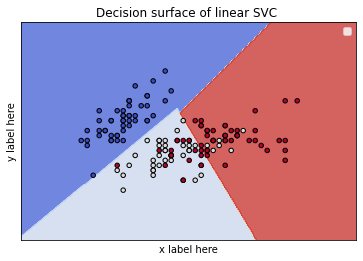

In [41]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
# Select 2 features / variable for the 2D plot that we are going to create.
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


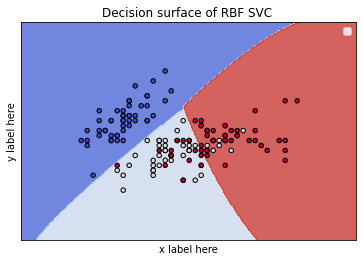

In [43]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
# Select 2 features / variable for the 2D plot that we are going to create.
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of RBF SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


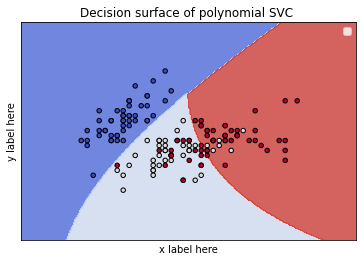

In [45]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
# Select 2 features / variable for the 2D plot that we are going to create.
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='poly')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of polynomial SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


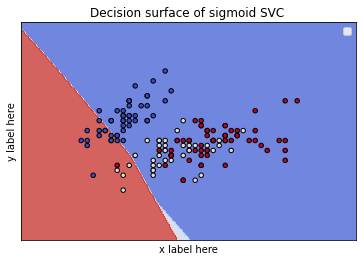

In [46]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
# Select 2 features / variable for the 2D plot that we are going to create.
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='sigmoid')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of sigmoid SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()
